Лабораторна робота 1.1 студента С. О. Семерікова

Варіант 10: Споживання електроенергії

Опис: Залежність споживання електроенергії (кВт·год) від середньодобової температури (°C). Набір даних:

x_train = np.array([-5, 0, 5, 10, 15, 20, 25, 30, 35])  # температура в °C

y_train = np.array([320, 280, 240, 200, 170, 150, 170, 210, 260])  # споживання в кВт·год

Рекомендовані параметри для початку:

* w_init = -4
* b_init = 200
* alpha = 0.01
* iterations = 10000


In [43]:
w2_init = -4
w1_init = -4
b_init = 200
alpha = 0.01
iterations = 10000

    2. Підготовка даних
        * Імпортуйте необхідні бібліотеки
        * Завантажте дані відповідно до вашого варіанту
        * Візуалізуйте дані для розуміння їх структури

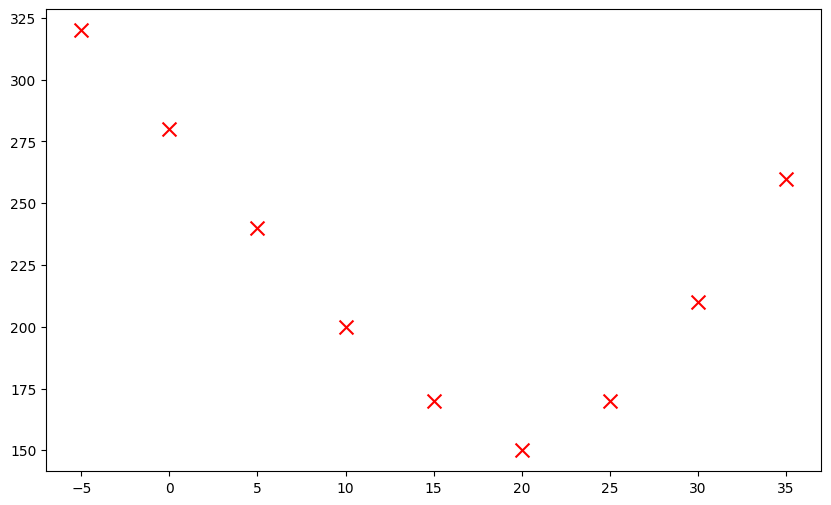

In [44]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([-5, 0, 5, 10, 15, 20, 25, 30, 35]) # температура в °C
y_train = np.array([320, 280, 240, 200, 170, 150, 170, 210, 260])  # споживання в кВт·год

plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, marker='x', c='r', s=100, label='Навчальні дані')

1: $y_{обч} = f(x) = wx + b$ - погано

2: $y_{обч} = w_2x^2 + w_1x + b$ - можливо, краще



    3. Реалізація функцій
        * Реалізуйте функцію обчислення вихідних значень моделі compute_model_output
        * Реалізуйте функцію обчислення вартості compute_cost
        * Реалізуйте функцію обчислення градієнту compute_gradient
        * Реалізуйте функцію градієнтного спуску gradient_descent

In [45]:
# 1. Функція обчислення моделі
def compute_model_output(x, w1, w2, b):
    """
    Обчислює прогноз лінійної моделі
    Аргументи:
      x (ndarray (m,)): Дані, m прикладів
      w, b (скаляри): параметри моделі
    Повертає:
      y (ndarray (m,)): цільові значення
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w2 * x[i]*x[i] + w1 * x[i] + b

    return f_wb

In [46]:
y_hat = compute_model_output(x_train, w1_init, w2_init, b_init)

In [47]:
y_hat

array([  120.,   200.,    80.,  -240.,  -760., -1480., -2400., -3520.,
       -4840.])

In [48]:
y_train

array([320, 280, 240, 200, 170, 150, 170, 210, 260])

In [49]:
# 2. Функція обчислення вартості
def compute_cost(x, y, w1, w2, b):
    """
    Обчислює функцію вартості для лінійної регресії
    Аргументи:
      x (ndarray (m,)): Дані, m прикладів
      y (ndarray (m,)): цільові значення
      w1, w2, b (скаляри): параметри моделі
    Повертає:
      total_cost (float): вартість використання w,b як параметрів для лінійної регресії
    """
    m = x.shape[0]

    total_cost = 0
    f_wb = compute_model_output(x, w1, w2, b)
    for i in range(m):
        total_cost = total_cost + (f_wb[i] - y[i]) ** 2
    total_cost = (1 / (2 * m)) * total_cost

    return total_cost

In [50]:
J = compute_cost(x_train, y_train, w1_init, w2_init, b_init)
J

np.float64(2795288.8888888885)

In [51]:
# 3. Функція обчислення градієнта
def compute_gradient(x, y, w1, w2, b):
    """
    Обчислює градієнт для лінійної регресії
    Аргументи:
      x (ndarray (m,)): Дані, m прикладів
      y (ndarray (m,)): цільові значення
      w1, w2, b (скаляри): параметри моделі
    Повертає:
      dj_dw1 (скаляр): Градієнт функції вартості відносно параметра w1
      dj_dw2 (скаляр): Градієнт функції вартості відносно параметра w2
      dj_db (скаляр): Градієнт функції вартості відносно параметра b
    """
    m = x.shape[0]
    dj_dw1 = 0
    dj_dw2 = 0
    dj_db = 0

    f_wb = compute_model_output(x, w1, w2, b)
    for i in range(m):
        dj_dw1 += (f_wb[i] - y[i]) * x[i]
        dj_dw2 += 2 * (f_wb[i] - y[i]) * x[i]
        dj_db += (f_wb[i] - y[i]) * 1

    dj_dw1 = dj_dw1 / m
    dj_dw2 = dj_dw2 / m
    dj_db = dj_db / m

    return dj_dw1, dj_dw2, dj_db

In [52]:
dJ_dw1, dJ_dw2, dJ_db = compute_gradient(x_train, y_train, w1_init, w2_init, b_init)
dJ_dw1, dJ_dw2, dJ_db

(np.float64(-45044.444444444445),
 np.float64(-90088.88888888889),
 np.float64(-1648.888888888889))

In [53]:
# 4. Функція градієнтного спуску
def gradient_descent(x, y, w1_in, w2_in, b_in, alpha, num_iters):
    """
    Виконує градієнтний спуск для пошуку w1, w2, b

    Аргументи:
      x (ndarray (m,)): Дані, m прикладів
      y (ndarray (m,)): цільові значення
      w1_in, w2_in, b_in (скаляри): початкові значення параметрів моделі
      alpha (float): швидкість навчання
      num_iters (int): кількість ітерацій градієнтного спуску

    Повертає:
      w1 (скаляр): Оновлене значення параметра w1 після градієнтного спуску
      w2 (скаляр): Оновлене значення параметра w2 після градієнтного спуску
      b (скаляр): Оновлене значення параметра b після градієнтного спуску
      J_history (List): Історія значень функції вартості
      p_history (list): Історія параметрів [w,b]
    """

    # Масив для збереження значень вартості J та параметрів w, b
    J_history = []
    p_history = []
    b = b_in
    w1 = w1_in
    w2 = w2_in

    for i in range(num_iters):
        # Обчислення градієнту
        dj_dw1, dj_dw2, dj_db = compute_gradient(x, y, w1, w2, b)

        # Оновлення параметрів
        w1 = w1 - alpha * dj_dw1
        w2 = w2 - alpha * dj_dw2
        b = b - alpha * dj_db

        # Збереження історії
        J_history.append(compute_cost(x, y, w1, w2, b))
        p_history.append([w1, w2, b])

        # Вивід проміжних результатів
        if i % (num_iters // 10) == 0 or i == num_iters - 1:
            print(f"Ітерація {i:4}: Вартість {J_history[-1]:0.2e}, ",
                  f"dj_dw1: {dj_dw1: 0.3e}, dj_dw2: {dj_dw2: 0.3e}, dj_db: {dj_db: 0.3e}, ",
                  f"w1: {w1: 0.3e}, w2: {w2: 0.3e}, b: {b: 0.5e}")

    return w1, w2, b, J_history, p_history

In [54]:
w1, w2, b, J_history, p_history = gradient_descent(x_train, y_train, w1_init, w2_init, b_init, alpha, iterations)

Ітерація    0: Вартість 1.35e+11,  dj_dw1: -4.504e+04, dj_dw2: -9.009e+04, dj_db: -1.649e+03,  w1:  4.464e+02, w2:  8.969e+02, b:  2.16489e+02
Ітерація 1000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan
Ітерація 2000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan


<ipython-input-49-86fdfde3212c>:17: RuntimeWarning: overflow encountered in scalar power
  total_cost = total_cost + (f_wb[i] - y[i]) ** 2
<ipython-input-45-d6356ef6f7cb>:14: RuntimeWarning: overflow encountered in scalar multiply
  f_wb[i] = w2 * x[i]*x[i] + w1 * x[i] + b
<ipython-input-51-53834d53a7cc>:21: RuntimeWarning: overflow encountered in scalar add
  dj_dw1 += (f_wb[i] - y[i]) * x[i]
<ipython-input-51-53834d53a7cc>:22: RuntimeWarning: overflow encountered in scalar multiply
  dj_dw2 += 2 * (f_wb[i] - y[i]) * x[i]
<ipython-input-51-53834d53a7cc>:21: RuntimeWarning: overflow encountered in scalar multiply
  dj_dw1 += (f_wb[i] - y[i]) * x[i]
<ipython-input-51-53834d53a7cc>:23: RuntimeWarning: overflow encountered in scalar add
  dj_db += (f_wb[i] - y[i]) * 1
<ipython-input-45-d6356ef6f7cb>:14: RuntimeWarning: invalid value encountered in scalar add
  f_wb[i] = w2 * x[i]*x[i] + w1 * x[i] + b
<ipython-input-45-d6356ef6f7cb>:14: RuntimeWarning: invalid value encountered in scalar m

Ітерація 3000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan
Ітерація 4000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan
Ітерація 5000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan
Ітерація 6000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan
Ітерація 7000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan
Ітерація 8000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan
Ітерація 9000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan
Ітерація 9999: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan


In [55]:
alpha /= 10
w1, w2, b, J_history, p_history = gradient_descent(x_train, y_train, w1_init, w2_init, b_init, alpha, iterations)

Ітерація    0: Вартість 1.24e+09,  dj_dw1: -4.504e+04, dj_dw2: -9.009e+04, dj_db: -1.649e+03,  w1:  4.104e+01, w2:  8.609e+01, b:  2.01649e+02
Ітерація 1000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan
Ітерація 2000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan
Ітерація 3000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan
Ітерація 4000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan
Ітерація 5000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan


<ipython-input-49-86fdfde3212c>:17: RuntimeWarning: overflow encountered in scalar power
  total_cost = total_cost + (f_wb[i] - y[i]) ** 2
<ipython-input-51-53834d53a7cc>:22: RuntimeWarning: overflow encountered in scalar multiply
  dj_dw2 += 2 * (f_wb[i] - y[i]) * x[i]
<ipython-input-51-53834d53a7cc>:21: RuntimeWarning: overflow encountered in scalar multiply
  dj_dw1 += (f_wb[i] - y[i]) * x[i]
<ipython-input-45-d6356ef6f7cb>:14: RuntimeWarning: invalid value encountered in scalar add
  f_wb[i] = w2 * x[i]*x[i] + w1 * x[i] + b
<ipython-input-45-d6356ef6f7cb>:14: RuntimeWarning: invalid value encountered in scalar multiply
  f_wb[i] = w2 * x[i]*x[i] + w1 * x[i] + b


Ітерація 6000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan
Ітерація 7000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan
Ітерація 8000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan
Ітерація 9000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan
Ітерація 9999: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan


In [56]:
alpha /= 10
w1, w2, b, J_history, p_history = gradient_descent(x_train, y_train, w1_init, w2_init, b_init, alpha, iterations)

Ітерація    0: Вартість 4.08e+06,  dj_dw1: -4.504e+04, dj_dw2: -9.009e+04, dj_db: -1.649e+03,  w1:  5.044e-01, w2:  5.009e+00, b:  2.00165e+02
Ітерація 1000: Вартість 1.61e+175,  dj_dw1: -8.939e+88, dj_dw2: -1.788e+89, dj_db: -3.223e+87,  w1:  4.902e+84, w2:  9.804e+84, b:  1.76747e+83
Ітерація 2000: Вартість inf,  dj_dw1: -1.774e+173, dj_dw2: -3.548e+173, dj_db: -6.396e+171,  w1:  9.728e+168, w2:  1.946e+169, b:  3.50754e+167
Ітерація 3000: Вартість inf,  dj_dw1: -3.520e+257, dj_dw2: -7.041e+257, dj_db: -1.269e+256,  w1:  1.931e+253, w2:  3.861e+253, b:  6.96071e+251
Ітерація 4000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan


<ipython-input-49-86fdfde3212c>:17: RuntimeWarning: overflow encountered in scalar add
  total_cost = total_cost + (f_wb[i] - y[i]) ** 2
<ipython-input-49-86fdfde3212c>:17: RuntimeWarning: overflow encountered in scalar power
  total_cost = total_cost + (f_wb[i] - y[i]) ** 2
<ipython-input-51-53834d53a7cc>:22: RuntimeWarning: overflow encountered in scalar add
  dj_dw2 += 2 * (f_wb[i] - y[i]) * x[i]
<ipython-input-45-d6356ef6f7cb>:14: RuntimeWarning: invalid value encountered in scalar multiply
  f_wb[i] = w2 * x[i]*x[i] + w1 * x[i] + b


Ітерація 5000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan
Ітерація 6000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan
Ітерація 7000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan
Ітерація 8000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan
Ітерація 9000: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan
Ітерація 9999: Вартість nan,  dj_dw1:  nan, dj_dw2:  nan, dj_db:  nan,  w1:  nan, w2:  nan, b:  nan


In [57]:
alpha /= 10
w1, w2, b, J_history, p_history = gradient_descent(x_train, y_train, w1_init, w2_init, b_init, alpha, iterations)

Ітерація    0: Вартість 1.70e+06,  dj_dw1: -4.504e+04, dj_dw2: -9.009e+04, dj_db: -1.649e+03,  w1: -3.550e+00, w2: -3.099e+00, b:  2.00016e+02
Ітерація 1000: Вартість 1.38e+03,  dj_dw1:  1.669e-02, dj_dw2:  3.338e-02, dj_db: -2.463e+01,  w1: -1.966e+00, w2:  6.832e-02, b:  2.00320e+02
Ітерація 2000: Вартість 1.38e+03,  dj_dw1:  1.661e-02, dj_dw2:  3.322e-02, dj_db: -2.452e+01,  w1: -1.966e+00, w2:  6.798e-02, b:  2.00566e+02
Ітерація 3000: Вартість 1.37e+03,  dj_dw1:  1.654e-02, dj_dw2:  3.307e-02, dj_db: -2.441e+01,  w1: -1.966e+00, w2:  6.765e-02, b:  2.00811e+02
Ітерація 4000: Вартість 1.37e+03,  dj_dw1:  1.646e-02, dj_dw2:  3.292e-02, dj_db: -2.430e+01,  w1: -1.966e+00, w2:  6.732e-02, b:  2.01054e+02
Ітерація 5000: Вартість 1.36e+03,  dj_dw1:  1.638e-02, dj_dw2:  3.277e-02, dj_db: -2.418e+01,  w1: -1.967e+00, w2:  6.699e-02, b:  2.01297e+02
Ітерація 6000: Вартість 1.36e+03,  dj_dw1:  1.631e-02, dj_dw2:  3.262e-02, dj_db: -2.407e+01,  w1: -1.967e+00, w2:  6.667e-02, b:  2.01538e+02

In [69]:
alpha = 0.00003

In [70]:
iterations = 100000

In [71]:
w1, w2, b, J_history, p_history = gradient_descent(x_train, y_train, w1_init, w2_init, b_init, alpha, iterations)

Ітерація    0: Вартість 3.20e+05,  dj_dw1: -4.504e+04, dj_dw2: -9.009e+04, dj_db: -1.649e+03,  w1: -2.649e+00, w2: -1.297e+00, b:  2.00049e+02
Ітерація 10000: Вартість 1.26e+03,  dj_dw1:  1.461e-02, dj_dw2:  2.921e-02, dj_db: -2.156e+01,  w1: -1.970e+00, w2:  5.925e-02, b:  2.07009e+02
Ітерація 20000: Вартість 1.17e+03,  dj_dw1:  1.273e-02, dj_dw2:  2.545e-02, dj_db: -1.879e+01,  w1: -1.974e+00, w2:  5.107e-02, b:  2.13052e+02
Ітерація 30000: Вартість 1.11e+03,  dj_dw1:  1.109e-02, dj_dw2:  2.218e-02, dj_db: -1.637e+01,  w1: -1.978e+00, w2:  4.393e-02, b:  2.18317e+02
Ітерація 40000: Вартість 1.07e+03,  dj_dw1:  9.663e-03, dj_dw2:  1.933e-02, dj_db: -1.426e+01,  w1: -1.981e+00, w2:  3.772e-02, b:  2.22904e+02
Ітерація 50000: Вартість 1.04e+03,  dj_dw1:  8.419e-03, dj_dw2:  1.684e-02, dj_db: -1.243e+01,  w1: -1.984e+00, w2:  3.230e-02, b:  2.26901e+02
Ітерація 60000: Вартість 1.03e+03,  dj_dw1:  7.336e-03, dj_dw2:  1.467e-02, dj_db: -1.083e+01,  w1: -1.986e+00, w2:  2.758e-02, b:  2.303

    4. Запуск градієнтного спуску
        * Ініціалізуйте початкові значення параметрів
        * Виконайте алгоритм градієнтного спуску для знаходження оптимальних параметрів

In [72]:
iterations = 100000

In [73]:
alpha = 0.00003

In [74]:
w1, w2, b, J_history, p_history = gradient_descent(x_train, y_train, w1_init, w2_init, b_init, alpha, iterations)

Ітерація    0: Вартість 3.20e+05,  dj_dw1: -4.504e+04, dj_dw2: -9.009e+04, dj_db: -1.649e+03,  w1: -2.649e+00, w2: -1.297e+00, b:  2.00049e+02
Ітерація 10000: Вартість 1.26e+03,  dj_dw1:  1.461e-02, dj_dw2:  2.921e-02, dj_db: -2.156e+01,  w1: -1.970e+00, w2:  5.925e-02, b:  2.07009e+02
Ітерація 20000: Вартість 1.17e+03,  dj_dw1:  1.273e-02, dj_dw2:  2.545e-02, dj_db: -1.879e+01,  w1: -1.974e+00, w2:  5.107e-02, b:  2.13052e+02
Ітерація 30000: Вартість 1.11e+03,  dj_dw1:  1.109e-02, dj_dw2:  2.218e-02, dj_db: -1.637e+01,  w1: -1.978e+00, w2:  4.393e-02, b:  2.18317e+02
Ітерація 40000: Вартість 1.07e+03,  dj_dw1:  9.663e-03, dj_dw2:  1.933e-02, dj_db: -1.426e+01,  w1: -1.981e+00, w2:  3.772e-02, b:  2.22904e+02
Ітерація 50000: Вартість 1.04e+03,  dj_dw1:  8.419e-03, dj_dw2:  1.684e-02, dj_db: -1.243e+01,  w1: -1.984e+00, w2:  3.230e-02, b:  2.26901e+02
Ітерація 60000: Вартість 1.03e+03,  dj_dw1:  7.336e-03, dj_dw2:  1.467e-02, dj_db: -1.083e+01,  w1: -1.986e+00, w2:  2.758e-02, b:  2.303

In [75]:
y_hat = compute_model_output(x_train, w1, w2, b)

In [77]:
w1, w2, b

(np.float64(-1.9929770150311372),
 np.float64(0.01404596993767788),
 np.float64(240.37431647774304))

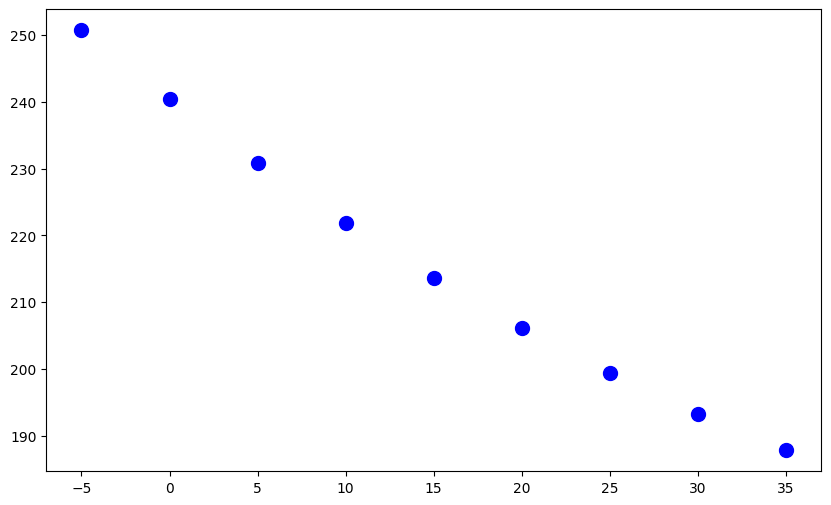

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_hat, marker='o', c='b', s=100, label='Обчислені дані')

TypeError: unsupported operand type(s) for +: 'PathCollection' and 'PathCollection'

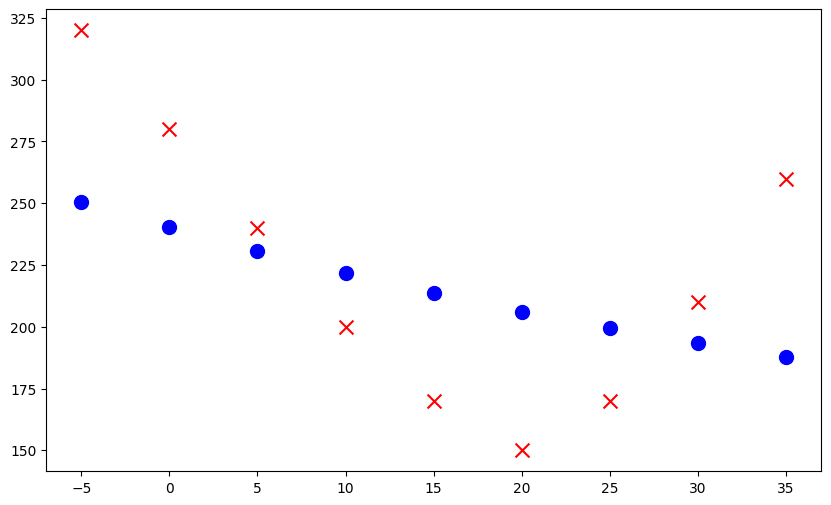

In [78]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_hat, marker='o', c='b', s=100, label='Обчислені дані') + plt.scatter(x_train, y_train, marker='x', c='r', s=100, label='Навчальні дані')

    5. Аналіз та візуалізація результатів
        ◦ Візуалізуйте дані та отриману модель
        ◦ Проаналізуйте процес навчання (зміну функції вартості)
        ◦ Використайте модель для прогнозування

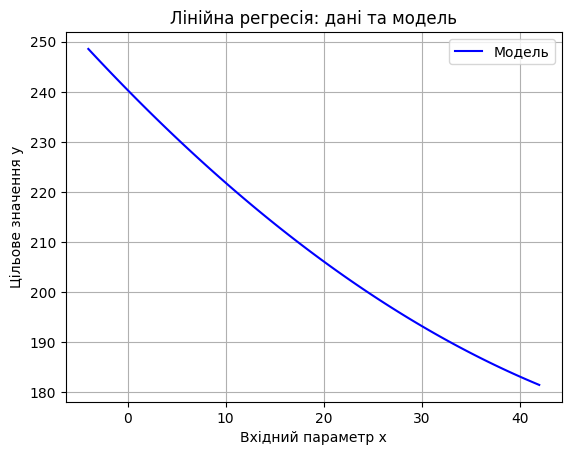

In [80]:
# Обчислення значень моделі для виводу лінії
x_line = np.linspace(np.min(x_train) * 0.8, np.max(x_train) * 1.2, 100)
y_line = w1 * x_line + w2 * x_line ** 2 + b

plt.plot(x_line, y_line, 'b-', label='Модель')
plt.xlabel('Вхідний параметр x')
plt.ylabel('Цільове значення y')
plt.title('Лінійна регресія: дані та модель')
plt.legend()
plt.grid(True)
plt.show()


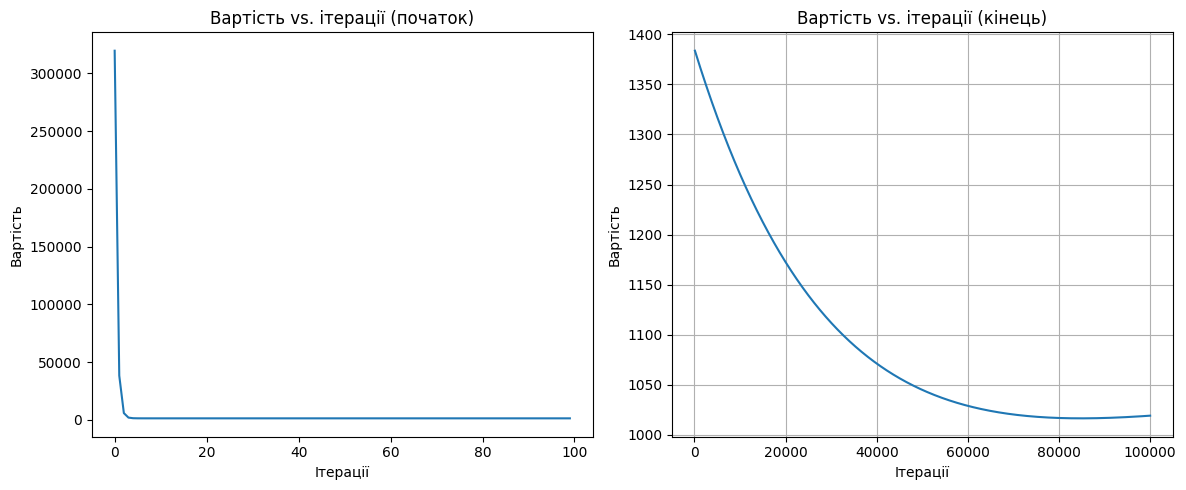

In [81]:
# 6.2 Візуалізація зміни функції вартості
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(J_history[:100])
plt.title('Вартість vs. ітерації (початок)')
plt.xlabel('Ітерації')
plt.ylabel('Вартість')

plt.subplot(1, 2, 2)
plt.plot(range(100, len(J_history)), J_history[100:])
plt.title('Вартість vs. ітерації (кінець)')
plt.xlabel('Ітерації')
plt.ylabel('Вартість')
plt.grid(True)
plt.tight_layout()
plt.show()

In [82]:
# 7. Використання моделі для прогнозування
def predict(x, w1, w2, b):
    """
    Прогнозування за допомогою лінійної моделі

    Аргументи:
      x (скаляр): вхідне значення для прогнозування
      w, b (скаляри): параметри моделі

    Повертає:
      y_pred (скаляр): прогнозоване значення
    """
    return w1 * x + w2 * x*x + b


In [83]:
# Приклади прогнозування
test_values = [np.min(x_train), np.max(x_train), (np.min(x_train) + np.max(x_train)) / 2]
print("\nПрогнози моделі:")
for x_value in test_values:
    y_pred = predict(x_value, w1, w2, b)
    print(f"При x = {x_value:.2f}, прогноз y = {y_pred:.2f}")

# Додатковий аналіз - коефіцієнт детермінації R²
def r_squared(y_true, y_pred):
    """
    Обчислює коефіцієнт детермінації R²

    Аргументи:
      y_true (ndarray): фактичні значення
      y_pred (ndarray): прогнозовані значення

    Повертає:
      r2 (скаляр): коефіцієнт детермінації
    """
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

# Обчислення прогнозів для навчальних даних
y_pred_train = w1 * x_train + w2 * x_train**2 + b

# Обчислення R²
r2 = r_squared(y_train, y_pred_train)
print(f"\nКоефіцієнт детермінації (R²): {r2:.4f}")



Прогнози моделі:
При x = -5.00, прогноз y = 250.69
При x = 35.00, прогноз y = 187.83
При x = 15.00, прогноз y = 213.64

Коефіцієнт детермінації (R²): 0.2933
